In [78]:

system = mda.Universe('../input/SYSTEM.pdb', f'lambda-1.000/traj000000001.dcd')
no_close_waters = []
no_frames_to_use = int(round(len(system.trajectory)*(100/100),0))
for frame in range(no_frames_to_use):
    system.trajectory[frame]
    no_close_waters.append(len(system.select_atoms('resname WAT and sphzone 5 index 0')))
    avg_close_waters = sum(no_close_waters)/len(no_close_waters)
print(round(avg_close_waters, 2))

6.65


In [71]:
print(system.select_atoms("index 4881"))

<AtomGroup [<Atom 4882: OH of type O of resname TYR, resid 323 and segid SYSTEM and altLoc >]>


In [79]:
import matplotlib.pyplot as plt
import os
import sys
import MDAnalysis as mda
import numpy as np

def avg_water_within_5(lam_val, percent_frames, index=0):
    '''Returns the average number of water molecules within 5 A of
    a given atom index for a given system (pdb), 
    percentage of frames, and lambda value. Default index is 0 (N of PRT)'''
    system = mda.Universe('../input/SYSTEM.pdb', f'lambda-{lam_val}/traj000000001.dcd')
    no_close_waters = []
    no_frames_to_use = int(round(len(system.trajectory)*(percent_frames/100),0))
    for frame in range(no_frames_to_use):
        system.trajectory[frame]
        no_close_waters.append(len(system.select_atoms(f'resname WAT and sphzone 5 index {index}')))
    avg_close_waters = sum(no_close_waters)/len(no_close_waters)
    return round(avg_close_waters, 2)


# Define lambda values
lam_folders = [x for x in os.listdir() if 'lambda' in x]
lam_folders.sort()
lam_vals = [x[-5:] for x in lam_folders]

# Specify list of percentages to use
percents = [10 + 10*x for x in range(10)]

# Calculate average number of waters within 5 A of selected residue
# of time percentages
av_close_waters_with_time = []
for percent in percents:
    avg_close_waters = []
    for lam_val in lam_vals:
        avg_close_waters.append(avg_water_within_5(lam_val,percent,0))
    av_close_waters_with_time.append(avg_close_waters)


#for i in range(no_windows):

/home/finlayclark/anaconda3/envs/biosimspace/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


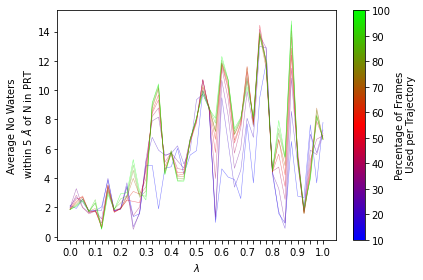

In [81]:
import matplotlib.cm as cm
import matplotlib.colors as colors

norm = colors.Normalize(vmin=10, vmax=100, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.brg)

fig, ax = plt.subplots()
fig.colorbar(mapper).set_label('Percentage of Frames\n Used per Trajectory')
for i in range(len(percents)):
    ax.plot(lam_vals, av_close_waters_with_time[i], c=mapper.to_rgba(percents[i]), alpha=0.5, lw=0.5)
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel('Average No Waters\n within 5 $\AA$ of N in PRT')

rounded_lam_vals =  [round(float(x),2) for x in lam_vals]

ax.set_xticklabels(rounded_lam_vals)
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.tight_layout()
fig.savefig('waters_within_5.png', dpi=1000, facecolor='w')